# üìí Kaggle_AllInOne_Pro.ipynb ‚Äì Îã®Ïùº ÎÖ∏Ìä∏Î∂Å ÌÜµÌï© Î≤ÑÏ†Ñ

## üéØ Í∞úÏöî

Î≥∏ ÎÖ∏Ìä∏Î∂ÅÏùÄ **VQA Kaggle Challenge**Î•º ÏúÑÌïú **ÏôÑÏ†Ñ ÌÜµÌï© Í≥†ÏÑ±Îä• ÌååÏù¥ÌîÑÎùºÏù∏**ÏûÖÎãàÎã§.

### ‚ú® Ï£ºÏöî Í∏∞Îä•

- ‚úÖ **T4 GPU ÏôÑÎ≤Ω Ìò∏Ìôò** (Float16, SDPA attention)
- ‚úÖ **ÎùºÎ≤® Ï†ïÎ†¨ ÍµêÏ†ï** (Assistant Î©îÏãúÏßÄÏóê Ï†ïÎãµ Ìè¨Ìï®)
- ‚úÖ **K-Fold Cross-Validation** (Stratified)
- ‚úÖ **Í≥†Í∏â ÌïôÏäµ Í∏∞Î≤ï** (AMP, EMA, SWA, Cosine Warmup)
- ‚úÖ **Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï** (Choice Shuffle, Paraphrase)
- ‚úÖ **TTA (Test-Time Augmentation)**
- ‚úÖ **ÏïôÏÉÅÎ∏î** (Weighted Voting)
- ‚úÖ **Î©îÎ™®Î¶¨ ÏµúÏ†ÅÌôî** (Gradient Checkpointing, 4-bit QLoRA)

### üìä ÏòàÏÉÅ ÏÑ±Îä•

| ÏÑ§Ï†ï | Ï†ïÌôïÎèÑ | ÏãúÍ∞Ñ |
|------|--------|------|
| Single Fold | 79-82% | ~4h |
| 3-Fold Ensemble | 83-85% | ~12h |
| + TTA + Optimization | 85-88% | ~15h |

### üöÄ Ïã§Ìñâ ÏàúÏÑú

1. **ÌôòÍ≤Ω ÏÑ§Ï†ï** - Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
2. **Config** - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
3. **Îç∞Ïù¥ÌÑ∞ Î°úÎìú** - Train/Test Îç∞Ïù¥ÌÑ∞ Î°úÎìú
4. **EDA** - ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
5. **Stratified K-Fold** - CV Splits ÏÉùÏÑ±
6. **Dataset & DataLoader** - Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
7. **Model & Processor** - QLoRA Î™®Îç∏ Î°úÎìú
8. **Training Loop** - Í≥†Í∏â Í∏∞Î≤ï Ï†ÅÏö© ÌïôÏäµ
9. **Inference** - TTAÎ•º ÌôúÏö©Ìïú Ï∂îÎ°†
10. **Ensemble** - ÏïôÏÉÅÎ∏î Î∞è Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±

---

**ü§ñ Generated for SSAFY AI Project 2025**

## üì¶ 1. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï©ÎãàÎã§. (Ï≤´ Ïã§Ìñâ Ïãú 1ÌöåÎßå)

### ‚ö†Ô∏è Ï§ëÏöî: ÏÑ§Ïπò ÌõÑ Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë ÌïÑÏöî

In [1]:
# Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (Colab/Kaggle ÌôòÍ≤Ω)
# Ï≤´ Ïã§Ìñâ ÏãúÏóêÎßå Ï£ºÏÑù Ìï¥Ï†úÌïòÍ≥† Ïã§Ìñâ
!pip install -q "transformers>=4.44.2" "accelerate>=0.34.2" "peft>=0.13.2" \
    "bitsandbytes>=0.43.1" datasets pillow pandas torch torchvision nltk \
    scikit-learn matplotlib seaborn tqdm sentencepiece --upgrade
!pip install -q qwen-vl-utils==0.0.8

print("‚úÖ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò ÏôÑÎ£å! Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌïòÏÑ∏Ïöî.")

‚úÖ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò ÏôÑÎ£å! Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌïòÏÑ∏Ïöî.


## üìö 2. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [3]:
import os, sys, re, math, random, warnings
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from dataclasses import dataclass
from typing import Dict, List, Any, Optional
from collections import Counter
import unicodedata

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.swa_utils import AveragedModel, SWALR

# Transformers & PEFT
from transformers import (
    AutoProcessor,
    BitsAndBytesConfig,
    get_cosine_schedule_with_warmup,
    get_linear_schedule_with_warmup,
    LogitsProcessorList
)
import torchvision.transforms as T
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

# Scikit-learn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# Env hygiene
warnings.filterwarnings('ignore')
Image.MAX_IMAGE_PIXELS = None
sns.set_style('whitegrid')

# Runtime info
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f" Device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

print(f" Python: {sys.version.split()[0]}")
print(f" PyTorch: {torch.__version__}")


 Device: cuda
   GPU: NVIDIA A100-SXM4-80GB
   Memory: 85.17 GB
 Python: 3.12.12
 PyTorch: 2.9.0+cu128


## ‚öôÔ∏è 3. Config ÏÑ§Ï†ï

Î™®Îì† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ìïú Í≥≥ÏóêÏÑú Í¥ÄÎ¶¨Ìï©ÎãàÎã§.

In [ ]:
import os
import torch


class Config:
    """Qwen3-VL-8B Instruct ÏÑ§Ï†ï (FP16)

    Î™©Ìëú: ÎÜíÏùÄ Ï†ïÎãµÎ•†Í≥º ÏïàÏ†ïÏ†Å/Îπ†Î•∏ Ïã§Ìñâ
    - Î™®Îç∏: Qwen/Qwen3-VL-8B-Instruct (FP16)
    - Ï†ïÎ∞ÄÎèÑ: AMP(FP16) + SDPA Ïñ¥ÌÖêÏÖò
    - ÎùºÎ≤® ÎßàÏä§ÌÇπ: ÌîÑÎ°¨ÌîÑÌä∏(-100), Ï†ïÎãµÎßå ÌïôÏäµ
    - Î°úÏßì Ï†úÌïú: a/b/c/dÎßå ÏÉùÏÑ± (Ï∂îÎ°† ÏïàÏ†ïÌôî)
    - ÏûêÎèô ÌäúÎãù: GPU VRAMÏóê ÎßûÏ∂∞ Î∞∞Ïπò/ÎàÑÏ†Å Ïä§ÌÖù ÏûêÎèô Í≤∞Ï†ï

    Ï†ÑÌôò ÏòµÏÖò:
    - QUANTIZATION="bnb4" ‚Üí 4bit QLoRA (Î©îÎ™®Î¶¨ Ï†àÏïΩ)
    - QUANTIZATION="fp16" ‚Üí FP16 (Í∏∞Î≥∏, Ï†ïÌôïÎèÑ Ïö∞ÏÑ†)

    Í∂åÏû• Ïã§Ìñâ ÏàúÏÑú:
    1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú/EDA
    2) K-Fold Î∂ÑÌï†(ÏÑ†ÌÉù): USE_KFOLD True
    3) Î™®Îç∏ Î°úÎìú(ÏûêÎèô ÌäúÎãù Ìè¨Ìï®)
    4) ÌïôÏäµ(ÎùºÎ≤® ÎßàÏä§ÌÇπ Ï†ÅÏö©)
    5) Ï∂îÎ°†(TTA/Î°úÏßì Ï†úÌïú)
    6) Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
    """

    # Seed
    SEED = 42

    # Model
    MODEL_ID = "Qwen/Qwen3-VL-8B-Instruct"
    # Quantization/backend selection: "fp16" | "bnb4" | "fp8"
    QUANTIZATION = "fp16"
    IMAGE_SIZE = 384  # 384/512/768
    USE_ADVANCED_MODEL = False
    USE_DATAPARALLEL = False
    NUM_WORKERS = 4

    # Data
    DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/data"
    TRAIN_CSV = f"{DATA_DIR}/train.csv"
    TEST_CSV  = f"{DATA_DIR}/test.csv"

    # K-Fold
    N_FOLDS = 3
    USE_KFOLD = False   # Ï†ïÌôïÎèÑ Í∑πÎåÄÌôî Ïãú True (ÌïôÏäµ ÏãúÍ∞Ñ Ï¶ùÍ∞Ä)
    TRAIN_FOLDS = [0, 1, 2]

    # LoRA / QLoRA
    LORA_R = 8
    LORA_ALPHA = 16
    LORA_DROPOUT = 0.05
    TARGET_MODULES = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj"
    ]

    # Training
    NUM_EPOCHS = 2     # Ï†ïÌôïÎèÑ ‚Üë ÏõêÌïòÎ©¥ 3~5Î°ú Ï¶ùÍ∞Ä
    BATCH_SIZE = 16     # ÏûêÎèô ÌäúÎãùÏúºÎ°ú Ï°∞Ï†ïÎê®
    GRAD_ACCUM_STEPS = 4
    LEARNING_RATE = 1e-4
    WEIGHT_DECAY = 0.01
    WARMUP_RATIO = 0.03
    MAX_GRAD_NORM = 1.0

    # Precision & schedules
    USE_AMP = True
    USE_EMA = True
    EMA_DECAY = 0.999
    USE_SWA = False
    SWA_START_EPOCH = 0
    USE_COSINE_SCHEDULE = True

    # Augment
    USE_IMAGE_AUGMENTATION = False
    USE_RANDAUGMENT = True
    RANDAUG_N = 2
    RANDAUG_M = 9
    USE_MIXUP = False
    MIXUP_ALPHA = 0.2
    USE_CUTMIX = False
    CUTMIX_ALPHA = 1.0

    # Text aug
    USE_BACK_TRANSLATION = False
    USE_SYNONYM_AUG = False
    TEXT_AUG_PROB = 0.15

    # TTA
    USE_TTA = False
    TTA_SCALES = [0.9, 1.0, 1.1]
    TTA_HFLIP = True

    # Generation
    MAX_NEW_TOKENS = 1
    DO_SAMPLE = False
    TEMPERATURE = 0.0

    # Paths
    SAVE_DIR = f"/content/checkpoints"
    OUTPUT_DIR = f"{DATA_DIR}/outputs_last2"

    # Sampling
    USE_SAMPLE = False  # Ï†ïÌôïÎèÑ Ïö∞ÏÑ†: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
    SAMPLE_SIZE = 200

    # Ensemble
    ENSEMBLE_WEIGHTS = None

    # Chat system text
    SYSTEM_INSTRUCT = (
        "ÎãπÏã†ÏùÄ ÏãúÍ∞ÅÏ†Å ÏßàÎ¨∏ÏùëÎãµ(VQA) Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§. "
        "Ïù¥ÎØ∏ÏßÄÏôÄ ÏßàÎ¨∏, Í∑∏Î¶¨Í≥† 4Í∞úÏùò Í∞ùÍ¥ÄÏãù ÏÑ†ÌÉùÏßÄÍ∞Ä Ï£ºÏñ¥ÏßëÎãàÎã§. "
        "Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ∏Ïã¨ÌïòÍ≤å Í¥ÄÏ∞∞ÌïòÍ≥†, ÏßàÎ¨∏Ïùò ÏùòÎØ∏Î•º Î™ÖÌôïÌûà Ïù¥Ìï¥Ìïú Îí§ "
        "Í∞Å Î≥¥Í∏∞Î•º ÎπÑÍµêÌïòÏó¨ Ï†ïÎãµÏùÑ Ï∂îÎ°†ÌïòÏÑ∏Ïöî. "
        "Î≥¥Í∏∞ÏóêÎäî Ïú†ÏÇ¨Ìïú Î¨∏Ìï≠Ïù¥ Îß§Ïö∞ ÎßéÏúºÎãà ÏµúÎåÄÌïú Ïã†Ï§ëÌïòÍ≤å ÏÑ†ÌÉùÌïòÏÑ∏Ïöî."
        "Ïù¥ÎØ∏ÏßÄÎäî ÏùºÏÉÅ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎßéÏúºÎãà ÏÑ†ÌÉùÏóê Ï∞∏Í≥†ÌïòÏó¨Ï£ºÏÑ∏Ïöî."
        "Ï†ïÎãµÏùÄ Î∞òÎìúÏãú Î≥¥Í∏∞ Ï§ë ÌïòÎÇò(a, b, c, d)Ïù¥Î©∞, "
        "Ï∂úÎ†•ÏùÄ ÏÜåÎ¨∏Ïûê ÏïåÌååÎ≤≥ Ìïú Í∏ÄÏûêÎßå Ìè¨Ìï®Ìï¥Ïïº Ìï©ÎãàÎã§. "
        "ÎãµÎ≥ÄÏóêÎäî ÏÑ§Î™ÖÏù¥ÎÇò Î¨∏Ïû•ÏùÄ Ìè¨Ìï®ÌïòÏßÄ ÎßàÏÑ∏Ïöî.\n\n"
        "--- English instruction ---\n"
        "You are an expert in Visual Question Answering (VQA). "
        "Given an image, a question, and four multiple-choice options (a, b, c, d), "
        "analyze the image carefully, understand the question, and reason which option is most correct. "
        "Your answer must be exactly one lowercase letter among a, b, c, or d ‚Äî no words, no explanations."
    )


    # Sequence
    MAX_SEQUENCE_LENGTH = 1024

    # Auto-tuning
    USE_AUTO_TUNE_BATCH_SIZE = False # <<-- ÏûêÎèô ÌäúÎãù ÌÜ†Í∏Ä Ï∂îÍ∞Ä


cfg = Config()


def set_seed(seed=42):
    import random, numpy as np, torch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_seed(cfg.SEED)

# GPU perf knobs
torch.backends.cuda.matmul.allow_tf32 = True
try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass


def _auto_scale_training(cfg):
    total_gb = 0.0
    if torch.cuda.is_available():
        props = torch.cuda.get_device_properties(0)
        total_gb = props.total_memory / 1024 ** 3

    # User can override
    target_effective = int(os.environ.get("EFFECTIVE_BATCH_SIZE", 16))
    suggested = 1
    if total_gb >= 70:
        suggested = 4
    elif total_gb >= 40:
        suggested = 2
    else:
        suggested = 1
    per_device = int(os.environ.get("PER_DEVICE_BATCH", suggested))

    cfg.BATCH_SIZE = max(1, per_device)
    cfg.GRAD_ACCUM_STEPS = max(1, target_effective // cfg.BATCH_SIZE)

    print(
        f" Auto-scale: GPU {total_gb:.1f} GB | per_device_batch={cfg.BATCH_SIZE} | "
        f"grad_accum={cfg.GRAD_ACCUM_STEPS} | target_effective={target_effective}"
    )

# _auto_scale_training(cfg) # <<-- ÏûêÎèô ÌäúÎãù Ìò∏Ï∂ú Î∂ÄÎ∂Ñ Ï£ºÏÑù Ï≤òÎ¶¨

print(f" Config loaded (Seed: {cfg.SEED})")
print(f"   Model: {cfg.MODEL_ID}")
print(
    f"   Training: BATCH={cfg.BATCH_SIZE}, ACCUM={cfg.GRAD_ACCUM_STEPS}, LR={cfg.LEARNING_RATE}, Cosine={cfg.USE_COSINE_SCHEDULE}"
)
print(
    f"   Advanced: AMP={cfg.USE_AMP}, EMA={cfg.USE_EMA}, SWA={cfg.USE_SWA}, TTA={cfg.USE_TTA}"
)
print(f"   Auto-tune batch size: {cfg.USE_AUTO_TUNE_BATCH_SIZE}") # <<-- ÏûêÎèô ÌäúÎãù ÏÑ§Ï†ï Ï∂úÎ†• Ï∂îÍ∞Ä

 Config loaded (Seed: 42)
   Model: Qwen/Qwen3-VL-8B-Instruct
   Training: BATCH=16, ACCUM=4, LR=0.0001, Cosine=True
   Advanced: AMP=True, EMA=True, SWA=False, TTA=False
   Auto-tune batch size: False


## üìä 4. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è EDA

Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Í∞ÑÎã®Ìïú ÌÉêÏÉâÏ†Å Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

üìÅ Train: 3,887 samples
üìÅ Test: 3,887 samples

Columns: ['id', 'path', 'question', 'a', 'b', 'c', 'd', 'answer']

üìä Answer Distribution:
answer
a     964
b     958
c     960
d    1005
Name: count, dtype: int64


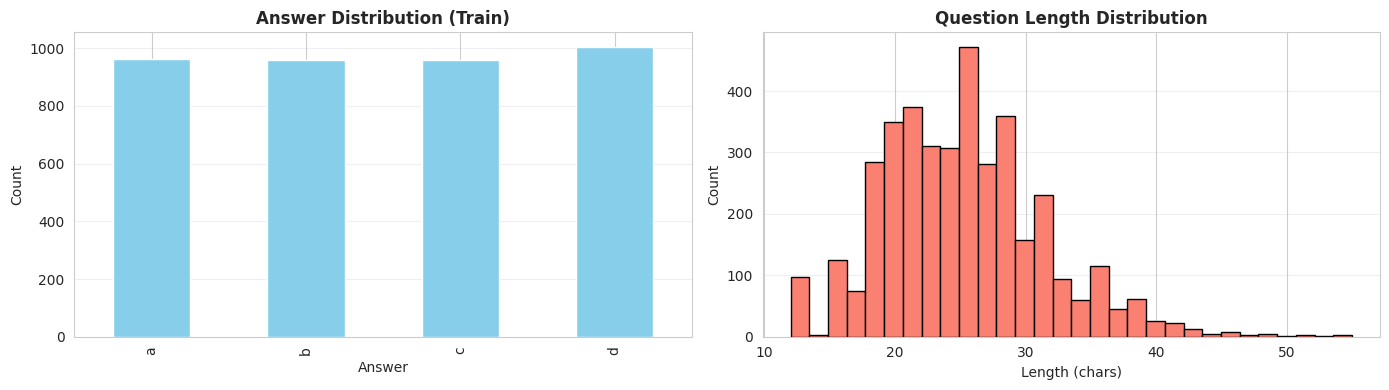


üìù Sample Data:
           id                  path                     question       a   b  \
0  train_0001  train/train_0001.jpg  Ïù¥ ÏÇ¨ÏßÑ ÏÜç Ïö¥ÎèôÍ∏∞Íµ¨Í∞Ä ÏÑ§ÏπòÎêú Ïû•ÏÜåÎäî Ïñ¥ÎîîÏùºÍπåÏöî?  ÌïôÍµê Ïö¥ÎèôÏû•  Í≥µÏõê   
1  train_0002  train/train_0002.jpg  Ïù¥ ÏÇ¨ÏßÑÏóê Î≥¥Ïù¥Îäî Ï†ÑÌÜµ ÌïúÍµ≠ Í±¥Ï∂ïÎ¨ºÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?      Í∂ÅÍ∂ê   ÏÑ±   

        c       d answer  question_len  
0  Ìó¨Ïä§Ïû• ÎÇ¥Î∂Ä  ÏáºÌïëÎ™∞ ÎÇ¥Î∂Ä      b            27  
1      ÏÇ¨Ï∞∞      ÌïúÏò•      d            27  


In [5]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_df = pd.read_csv(cfg.TRAIN_CSV)
test_df = pd.read_csv(cfg.TEST_CSV)

print(f"üìÅ Train: {len(train_df):,} samples")
print(f"üìÅ Test: {len(test_df):,} samples")
print(f"\nColumns: {list(train_df.columns)}")

# ÏÉòÌîåÎßÅ (ÎîîÎ≤ÑÍπÖÏö©)
if cfg.USE_SAMPLE:
    train_df = train_df.sample(n=min(cfg.SAMPLE_SIZE, len(train_df)), random_state=cfg.SEED).reset_index(drop=True)
    print(f"\n‚ö†Ô∏è  Sampled {len(train_df)} samples for quick testing")

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\nüìä Answer Distribution:")
print(train_df['answer'].value_counts().sort_index())

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ÎãµÎ≥Ä Î∂ÑÌè¨
train_df['answer'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Answer Distribution (Train)', fontsize=12, weight='bold')
axes[0].set_xlabel('Answer')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# ÏßàÎ¨∏ Í∏∏Ïù¥ Î∂ÑÌè¨
train_df['question_len'] = train_df['question'].str.len()
train_df['question_len'].hist(bins=30, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Question Length Distribution', fontsize=12, weight='bold')
axes[1].set_xlabel('Length (chars)')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ÏÉòÌîå Ï∂úÎ†•
print("\nüìù Sample Data:")
print(train_df.head(2))

## üîÑ 5. Stratified K-Fold Cross-Validation

ÎãµÎ≥Ä Î∂ÑÌè¨Î•º Ïú†ÏßÄÌïòÎ©¥ÏÑú K-FoldÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [6]:
if cfg.USE_KFOLD:
    # Stratified K-Fold ÏÉùÏÑ±
    skf = StratifiedKFold(n_splits=cfg.N_FOLDS, shuffle=True, random_state=cfg.SEED)
    train_df['fold'] = -1

    for fold, (train_idx, val_idx) in enumerate(skf.split(train_df, train_df['answer'])):
        train_df.loc[val_idx, 'fold'] = fold

    print(f"‚úÖ {cfg.N_FOLDS}-Fold CV ÏÉùÏÑ± ÏôÑÎ£å")
    print(f"\nFold Distribution:")
    print(train_df['fold'].value_counts().sort_index())

    # FoldÎ≥Ñ ÎãµÎ≥Ä Î∂ÑÌè¨ ÌôïÏù∏
    print(f"\nAnswer Distribution per Fold:")
    for fold in range(cfg.N_FOLDS):
        fold_data = train_df[train_df['fold'] == fold]
        dist = fold_data['answer'].value_counts(normalize=True).sort_index()
        print(f"Fold {fold}: {dict(dist)}")
else:
    # Îã®Ïùº Î™®Îç∏ ÌïôÏäµ (90:10 split)
    split_idx = int(len(train_df) * 0.9)
    train_df['fold'] = -1
    train_df.loc[split_idx:, 'fold'] = 0
    print(f"‚úÖ Single split (90:10) ÏÉùÏÑ± ÏôÑÎ£å")
    print(f"   Train: {len(train_df[train_df['fold'] == -1])}")
    print(f"   Valid: {len(train_df[train_df['fold'] == 0])}")

‚úÖ Single split (90:10) ÏÉùÏÑ± ÏôÑÎ£å
   Train: 3498
   Valid: 389


## üóÇÔ∏è 6. Dataset & DataLoader

Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è DataCollatorÎ•º Ï†ïÏùòÌï©ÎãàÎã§.

### ‚úÖ ÎùºÎ≤® Ï†ïÎ†¨ ÍµêÏ†ï Ï†ÅÏö©
- Assistant Î©îÏãúÏßÄÏóê Ï†ïÎãµ Ìè¨Ìï®
- `add_generation_prompt=False` ÏÇ¨Ïö©

In [7]:
import json, unicodedata
import numpy as np
from dataclasses import dataclass
from typing import Any, Dict
from PIL import Image
import torch
import torchvision.transforms as T


def build_mc_prompt(question, a, b, c, d):
    """Multiple Choice prompt"""
    return f"""
        ÏïÑÎûòÏùò ÏßàÎ¨∏Í≥º Î≥¥Í∏∞Îì§ÏùÑ Î≥¥Í≥†, Ïù¥ÎØ∏ÏßÄÎ•º Ï∞∏Í≥†ÌïòÏó¨ Í∞ÄÏû• ÏïåÎßûÏùÄ ÎãµÏùÑ ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.

        ÏßàÎ¨∏:
        {question}

        Î≥¥Í∏∞:
        a. {a}
        b. {b}
        c. {c}
        d. {d}

        Ï†ïÎãµÏùÄ ÏúÑ Î≥¥Í∏∞ Ï§ë ÌïòÎÇòÏù¥Î©∞, ÏÜåÎ¨∏Ïûê ÏïåÌååÎ≤≥(a, b, c, d) Ï§ë ÌïòÎÇòÎßå Ï∂úÎ†•ÌïòÏÑ∏Ïöî.
        Ï∂úÎ†•ÏóêÎäî ÏïåÌååÎ≤≥ Ïù¥Ïô∏Ïùò ÏÑ§Î™ÖÏù¥ÎÇò Î¨∏Ïû•ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÎßàÏÑ∏Ïöî.
    """


def synonym_replace(text: str) -> str:
    try:
        import nltk
        from nltk.corpus import wordnet as wn
        try:
            wn.synsets("test")
        except LookupError:
            nltk.download("wordnet")
            nltk.download("omw-1.4")
        words = text.split()
        if not words:
            return text
        idx = np.random.randint(len(words))
        syns = wn.synsets(words[idx])
        lemmas = [l.name().replace("_", " ") for s in syns for l in s.lemmas()]
        lemmas = [w for w in lemmas if w.lower() != words[idx].lower()]
        if not lemmas:
            return text
        words[idx] = np.random.choice(lemmas)
        return " ".join(words)
    except Exception:
        return text


def maybe_augment_text(question: str, options: Dict[str, str]):
    q, opts = question, dict(options)
    if cfg.USE_SYNONYM_AUG and np.random.rand() < cfg.TEXT_AUG_PROB:
        q = synonym_replace(q)
    return q, opts


class VQADataset(Dataset):
    """VQA Dataset (assistant label returned separately for proper masking)."""

    def __init__(self, df, processor, data_dir="", train=True, use_advanced=False):
        self.df = df.reset_index(drop=True)
        self.processor = processor
        self.data_dir = data_dir
        self.train = train
        self.use_advanced = use_advanced

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = os.path.join(self.data_dir, row["path"]) if "path" in row else row.get("image_path", "")
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception:
            img = Image.new('RGB', (cfg.IMAGE_SIZE, cfg.IMAGE_SIZE), color='white')

        q0 = str(row["question"]) if "question" in row else ""
        opts0 = {
            "a": str(row.get("a", "")),
            "b": str(row.get("b", "")),
            "c": str(row.get("c", "")),
            "d": str(row.get("d", "")),
        }
        if self.train:
            q0, opts0 = maybe_augment_text(q0, opts0)

        user_text = build_mc_prompt(q0, opts0["a"], opts0["b"], opts0["c"], opts0["d"])
        messages = [
            {"role": "system", "content": [{"type": "text", "text": cfg.SYSTEM_INSTRUCT}]},
            {"role": "user", "content": [
                {"type": "image", "image": img},
                {"type": "text", "text": user_text}
            ]}
        ]

        out = {"messages": messages, "image": img}
        if self.train:
            out["answer"] = str(row.get("answer", "")).strip().lower()
        return out


def _build_image_transform():
    if not cfg.USE_IMAGE_AUGMENTATION:
        return None
    ops = [T.RandomHorizontalFlip(p=0.5)]
    if cfg.USE_RANDAUGMENT:
        try:
            ops.append(T.RandAugment(num_ops=cfg.RANDAUG_N, magnitude=cfg.RANDAUG_M))
        except Exception:
            pass
    return T.Compose(ops)


_IMG_TF = _build_image_transform()


@dataclass
class DataCollator:
    """Data Collator with correct prompt masking for decoder-only training."""

    processor: Any
    train: bool = True
    use_advanced: bool = False
    augment_images: bool = True

    def __call__(self, batch):
        images, prompts, full_texts = [], [], []

        for sample in batch:
            img = sample["image"]
            if self.train and self.augment_images and _IMG_TF is not None:
                try:
                    img = _IMG_TF(img)
                except Exception:
                    pass

            messages = sample["messages"]
            prompt_text = self.processor.apply_chat_template(
                messages, tokenize=False, add_generation_prompt=True
            )

            if self.train and "answer" in sample and sample["answer"]:
                conversation = messages + [
                    {"role": "assistant", "content": [{"type": "text", "text": str(sample["answer"]).strip().lower()}]}
                ]
                full_text = self.processor.apply_chat_template(
                    conversation, tokenize=False, add_generation_prompt=False
                )
            else:
                full_text = prompt_text

            # Normalize text
            prompt_text = unicodedata.normalize('NFKC', prompt_text)
            full_text = unicodedata.normalize('NFKC', full_text)

            images.append(img)
            prompts.append(prompt_text)
            full_texts.append(full_text)

        # Encode prompt and full sequences
        enc_prompt = self.processor(
            images=images,
            text=prompts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=cfg.MAX_SEQUENCE_LENGTH,
        )
        enc_full = self.processor(
            images=images,
            text=full_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=cfg.MAX_SEQUENCE_LENGTH,
        )

        if self.train:
            labels = enc_full["input_ids"].clone()
            # mask pads
            labels[enc_full["attention_mask"] == 0] = -100
            # mask prompt tokens
            for i in range(labels.size(0)):
                full_mask = enc_full["attention_mask"][i].bool()
                prompt_len = int(enc_prompt["attention_mask"][i].sum().item())
                nonpad_idx = torch.nonzero(full_mask, as_tuple=False).squeeze(-1)
                prompt_idx = nonpad_idx[:prompt_len]
                labels[i, prompt_idx] = -100
            enc_full["labels"] = labels

        return enc_full


print("‚úÖ Dataset & DataCollator (with label masking) ready")


‚úÖ Dataset & DataCollator (with label masking) ready


## ü§ñ 7. Model & Processor Î°úÎìú

QLoRA Î™®Îç∏Í≥º ProcessorÎ•º Î°úÎìúÌï©ÎãàÎã§.

### ‚úÖ T4 Ìò∏Ìôò ÏÑ§Ï†ï
- Float16 (BFloat16 ÏïÑÎãò)
- SDPA attention (FlashAttention Ï†úÍ±∞)
- 4-bit quantization

In [8]:
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, AutoModelForVision2Seq, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training


def _fp8_supported():
    try:
        import transformer_engine.pytorch as te  # noqa: F401
    except Exception:
        return False
    if not torch.cuda.is_available():
        return False
    major, minor = torch.cuda.get_device_capability(0)
    if major < 9:  # Hopper(H100)=9.x, Ampere(A100)=8.0 -> FP8 ÎØ∏ÏßÄÏõê
        return False
    # PyTorch float8 ÌÉÄÏûÖ Ï°¥Ïû¨ Ïó¨Î∂Ä
    has_float8 = hasattr(torch, "float8_e4m3fn") and hasattr(torch, "float8_e5m2")
    return bool(has_float8)


def create_model_and_processor(model_id, use_advanced=False):
    """Create 4-bit QLoRA model + processor with left padding and auto device_map.
    For Qwen3-VL-30B-A3B-Instruct we use AutoModelForImageTextToText.
    """

    compute_dtype = torch.bfloat16 if (torch.cuda.is_available() and torch.cuda.is_bf16_supported()) else torch.float16
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=compute_dtype,
    )

    processor = AutoProcessor.from_pretrained(
        model_id,
        min_pixels=cfg.IMAGE_SIZE * cfg.IMAGE_SIZE,
        max_pixels=cfg.IMAGE_SIZE * cfg.IMAGE_SIZE,
        trust_remote_code=True,
    )
    if hasattr(processor, "tokenizer"):
        processor.tokenizer.padding_side = "left"

    qopt = getattr(cfg, "QUANTIZATION", "").lower()
    want_fp8 = ("fp8" in model_id.lower()) or (qopt == "fp8")
    want_bnb4 = (qopt == "bnb4")
    can_fp8 = _fp8_supported()
    use_fp8 = bool(want_fp8 and can_fp8)

    load_model_id = model_id
    if want_fp8 and not can_fp8:
        # FP8 ÎØ∏ÏßÄÏõê ÌôòÍ≤Ω(A100 Îì±)ÏóêÏÑúÎäî ÏùºÎ∞ò Í∞ÄÏ§ëÏπòÎ°ú Ìè¥Î∞±
        if model_id.lower().endswith("-fp8"):
            load_model_id = model_id[:-4]  # "-FP8" Ï†úÍ±∞
        print(f"[warn] FP8 not supported on this GPU. Falling back to 4-bit for {load_model_id}")

    def _load_image_text_to_text():
        return AutoModelForImageTextToText.from_pretrained(
            load_model_id,
            trust_remote_code=True,
            device_map="auto",
        )

    def _load_vision2seq(**kwargs):
        return AutoModelForVision2Seq.from_pretrained(
            load_model_id,
            trust_remote_code=True,
            device_map="auto",
            **kwargs,
        )

    if use_fp8:
        try:
            base_model = _load_image_text_to_text()
        except Exception:
            base_model = _load_vision2seq()
    elif want_bnb4:
        try:
            base_model = AutoModelForImageTextToText.from_pretrained(
                load_model_id,
                trust_remote_code=True,
                quantization_config=bnb_config,
                device_map="auto",
            )
        except Exception:
            base_model = _load_vision2seq(quantization_config=bnb_config)
    else:
        # FP16/BF16 Í≤ΩÎ°ú: ÏñëÏûêÌôî ÏóÜÏù¥ dtype ÏßÄÏ†ï
        try:
            base_model = AutoModelForImageTextToText.from_pretrained(
                load_model_id,
                trust_remote_code=True,
                torch_dtype=torch.float16,
                device_map="auto",
            )
        except Exception:
            base_model = _load_vision2seq(torch_dtype=torch.float16)

    if want_bnb4 and not use_fp8:
        base_model = prepare_model_for_kbit_training(base_model)
    base_model.gradient_checkpointing_enable()

    # Prefer SDPA attention for speed/stability on PyTorch 2.x
    try:
        if hasattr(base_model, "config"):
            base_model.config.attn_implementation = "sdpa"
        torch.backends.cuda.sdp_kernel(enable_flash=True, enable_mem_efficient=True, enable_math=False)
    except Exception:
        pass

    lora_config = LoraConfig(
        r=cfg.LORA_R,
        lora_alpha=cfg.LORA_ALPHA,
        lora_dropout=cfg.LORA_DROPOUT,
        bias="none",
        target_modules=cfg.TARGET_MODULES,
        task_type="CAUSAL_LM",
    )
    model = get_peft_model(base_model, lora_config)
    model.print_trainable_parameters()

    # ensure eos/pad ids are set to avoid generation issues
    try:
        if hasattr(model, "generation_config") and hasattr(processor, "tokenizer"):
            if model.generation_config.pad_token_id is None:
                model.generation_config.pad_token_id = processor.tokenizer.pad_token_id
            if model.generation_config.eos_token_id is None:
                model.generation_config.eos_token_id = processor.tokenizer.eos_token_id
    except Exception:
        pass
    return model, processor


print("   Loading model & processor...")
model, processor = create_model_and_processor(
    cfg.MODEL_ID,
    use_advanced=cfg.USE_ADVANCED_MODEL
)
print("   Model ready.")

# Optional compile for speed (set USE_TORCH_COMPILE=1)
import os as _os
if _os.environ.get("USE_TORCH_COMPILE", "0") == "1":
    try:
        model = torch.compile(model, mode="reduce-overhead", fullgraph=False)  # type: ignore[attr-defined]
        print("   Model compiled with torch.compile")
    except Exception as _e:
        print(f"[warn] torch.compile skipped: {_e}")


# -------------------------------
# ÏµúÎåÄ ÏïàÏ†Ñ Î∞∞Ïπò ÌÅ¨Í∏∞ ÏûêÎèô ÌÉêÏÉâ
# -------------------------------
import random


def _build_tmp_batch(ds, collate_fn, bs: int):
    idxs = [random.randrange(len(ds)) for _ in range(min(bs, len(ds)))]
    samples = [ds[i] for i in idxs]
    return collate_fn(samples)


def auto_tune_per_device_batch(model, processor, df, max_probe_samples: int = 64):
    if not torch.cuda.is_available():
        return cfg.BATCH_SIZE

    # ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏÖã/ÏΩúÎ†àÏù¥ÌÑ∞ (ÌïôÏäµ Î™®Îìú)
    probe_n = min(max_probe_samples, len(df))
    probe_df = df.sample(probe_n, random_state=cfg.SEED).reset_index(drop=True)
    ds = VQADataset(probe_df, processor, cfg.DATA_DIR, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)
    collate_fn = DataCollator(processor, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)

    # ÌõÑÎ≥¥Íµ∞: ÌòÑÏû¨ ÏÑ§Ï†ïÎ∂ÄÌÑ∞ Ï†êÏßÑ Ï¶ùÍ∞Ä
    base = max(1, int(cfg.BATCH_SIZE))
    candidates = sorted({1, 2, 3, 4, 6, 8, 12, 16, 24, 32, base})
    candidates = [c for c in candidates if c <= 32]

    best = 1
    compute_dtype = torch.float16
    scaler = torch.cuda.amp.GradScaler(enabled=cfg.USE_AMP)

    for bs in candidates:
        torch.cuda.empty_cache()
        ok = True
        try:
            batch = _build_tmp_batch(ds, collate_fn, bs)
            batch = {k: v.to('cuda') if hasattr(v, 'to') else v for k, v in batch.items()}
            model.train()
            with torch.cuda.amp.autocast(enabled=cfg.USE_AMP, dtype=compute_dtype):
                out = model(**batch)
                loss = out.loss
            scaler.scale(loss).backward()
            model.zero_grad(set_to_none=True)
            del batch, out, loss
        except RuntimeError as e:
            if 'out of memory' in str(e).lower():
                ok = False
            else:
                raise
        except torch.cuda.OutOfMemoryError:
            ok = False
        finally:
            torch.cuda.empty_cache()

        if ok:
            best = bs
        else:
            break

    # Î™©Ìëú Ïú†Ìö® Î∞∞ÏπòÏóê ÎßûÏ∂∞ ÎàÑÏ†Å Ïä§ÌÖù Ïû¨Ï°∞Ï†ï
    import os
    target_effective = int(os.environ.get("EFFECTIVE_BATCH_SIZE", 16))
    cfg.BATCH_SIZE = max(1, best)
    cfg.GRAD_ACCUM_STEPS = max(1, target_effective // cfg.BATCH_SIZE)
    print(
        f" Auto-tune: chosen per_device_batch={cfg.BATCH_SIZE} | grad_accum={cfg.GRAD_ACCUM_STEPS} | target_effective={target_effective}"
    )
    return cfg.BATCH_SIZE


try:
    # train_dfÎäî ÏïûÏÑ† ÏÖÄÏóêÏÑú Î°úÎìúÎê®
    if 'train_df' in globals() and len(train_df) > 0 and cfg.USE_AUTO_TUNE_BATCH_SIZE: # <-- Ï∂îÍ∞ÄÎêú Ï°∞Í±¥
        auto_tune_per_device_batch(model, processor, train_df)
except Exception as _e:
    print(f"[warn] Auto-tune skipped: {_e}")

   Loading model & processor...


preprocessor_config.json:   0%|          | 0.00/390 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/269 [00:00<?, ?B/s]

trainable params: 21,823,488 || all params: 8,788,947,184 || trainable%: 0.2483
   Model ready.


## üéì 8. Training Loop with Advanced Techniques

Í≥†Í∏â ÌïôÏäµ Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìïú ÌïôÏäµ Î£®ÌîÑÏûÖÎãàÎã§.

### ‚ú® Ï†ÅÏö©Îêú Í∏∞Î≤ï
- ‚úÖ **AMP** (Automatic Mixed Precision)
- ‚úÖ **EMA** (Exponential Moving Average)
- ‚úÖ **SWA** (Stochastic Weight Averaging)
- ‚úÖ **Cosine Warmup Scheduler**
- ‚úÖ **Gradient Clipping**

In [9]:
AMP_DTYPE = None
try:
    import torch as _torch
    AMP_DTYPE = _torch.float16
except Exception:
    AMP_DTYPE = None


class EMA:
    """Exponential Moving Average"""
    def __init__(self, model, decay=0.999):
        self.model = model
        self.decay = decay
        self.shadow = {}
        self.backup = {}
        self.register()

    def register(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.shadow[name] = param.data.clone()

    def update(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                new_average = (
                    self.decay * self.shadow[name] +
                    (1.0 - self.decay) * param.data
                )
                self.shadow[name] = new_average.clone()

    def apply_shadow(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.backup[name] = param.data.clone()
                param.data = self.shadow[name]

    def restore(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                param.data = self.backup[name]
        self.backup = {}


def train_one_fold(model, train_loader, valid_loader, fold=0):
    """ Fold """

    print(f"\n{'='*60}")
    print(f"Training Fold {fold}")
    print(f"{'='*60}")

    # Optimizer
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=cfg.LEARNING_RATE,
        weight_decay=cfg.WEIGHT_DECAY
    )

    # Scheduler
    num_training_steps = cfg.NUM_EPOCHS * math.ceil(len(train_loader) / cfg.GRAD_ACCUM_STEPS)
    num_warmup_steps = int(num_training_steps * cfg.WARMUP_RATIO)

    if cfg.USE_COSINE_SCHEDULE:
        scheduler = get_cosine_schedule_with_warmup(
            optimizer, num_warmup_steps, num_training_steps
        )
    else:
        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps, num_training_steps
        )

    # AMP Scaler
    scaler = torch.amp.GradScaler('cuda', enabled=cfg.USE_AMP)

    # EMA
    ema = EMA(model, decay=cfg.EMA_DECAY) if cfg.USE_EMA else None

    # SWA
    swa_model = None
    if cfg.USE_SWA:
        swa_model = AveragedModel(model)
        swa_scheduler = SWALR(optimizer, swa_lr=cfg.LEARNING_RATE * 0.1)

    #
    global_step = 0
    best_val_loss = float('inf')

    for epoch in range(cfg.NUM_EPOCHS):
        model.train()
        running_loss = 0.0

        progress_bar = tqdm(
            train_loader,
            desc=f"Epoch {epoch+1}/{cfg.NUM_EPOCHS} [train]",
            unit="batch"
        )

        for step, batch in enumerate(progress_bar, start=1):
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward with AMP
            with torch.amp.autocast('cuda', enabled=cfg.USE_AMP, dtype=AMP_DTYPE):
                outputs = model(**batch)
                loss = outputs.loss / cfg.GRAD_ACCUM_STEPS

            # Backward
            scaler.scale(loss).backward()
            running_loss += loss.item()

            # Gradient accumulation
            if step % cfg.GRAD_ACCUM_STEPS == 0:
                # Gradient clipping
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), cfg.MAX_GRAD_NORM)

                # Optimizer step
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad(set_to_none=True)

                # Scheduler step
                if cfg.USE_SWA and epoch >= cfg.SWA_START_EPOCH:
                    swa_scheduler.step()
                else:
                    scheduler.step()

                # EMA update
                if cfg.USE_EMA and ema is not None:
                    ema.update()

                global_step += 1

                # Progress
                avg_loss = running_loss / cfg.GRAD_ACCUM_STEPS
                progress_bar.set_postfix({
                    "loss": f"{avg_loss:.4f}",
                    "lr": f"{scheduler.get_last_lr()[0]:.2e}"
                })
                running_loss = 0.0

        # SWA model update
        if cfg.USE_SWA and swa_model is not None and epoch >= cfg.SWA_START_EPOCH:
            swa_model.update_parameters(model)

        # Validation
        if cfg.USE_EMA and ema is not None:
            ema.apply_shadow()

        val_loss = validate(model, valid_loader)

        if cfg.USE_EMA and ema is not None:
            ema.restore()

        print(f"[Epoch {epoch+1}] Valid Loss: {val_loss:.4f}")

        # Best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            save_path = f"{cfg.SAVE_DIR}/fold{fold}_best"
            os.makedirs(save_path, exist_ok=True)

            if cfg.USE_EMA and ema is not None:
                ema.apply_shadow()

            _to_save = model.module if isinstance(model, torch.nn.DataParallel) else model
            _to_save.save_pretrained(save_path)
            processor.save_pretrained(save_path)

            if cfg.USE_EMA and ema is not None:
                ema.restore()

            print(f"    Best model saved to {save_path}")

    # SWA
    if cfg.USE_SWA and swa_model is not None:
        torch.optim.swa_utils.update_bn(train_loader, swa_model, device=device)
        save_path = f"{cfg.SAVE_DIR}/fold{fold}_swa"
        os.makedirs(save_path, exist_ok=True)
        (swa_model.module if hasattr(swa_model, "module") else swa_model).save_pretrained(save_path)
        processor.save_pretrained(save_path)
        print(f"    SWA model saved to {save_path}")

    return best_val_loss


def validate(model, valid_loader):
    """Validation"""
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for batch in tqdm(valid_loader, desc="Validating", leave=False):
            batch = {k: v.to(device) for k, v in batch.items()}

            with torch.amp.autocast('cuda', enabled=cfg.USE_AMP, dtype=AMP_DTYPE):
                outputs = model(**batch)
                total_loss += outputs.loss.item()

    model.train()
    return total_loss / len(valid_loader)


print(" Training functions  ")


 Training functions  


## üöÄ 9. Ïã§Ï†ú ÌïôÏäµ Ïã§Ìñâ

K-Fold ÎòêÎäî Îã®Ïùº Î™®Îç∏ ÌïôÏäµÏùÑ Ïã§ÌñâÌï©ÎãàÎã§.

In [10]:
# # K-Fold
# if cfg.USE_KFOLD:
#     results = {}

#     for fold in cfg.TRAIN_FOLDS:
#         print(f"\n{'#'*60}")
#         print(f"Starting Fold {fold}/{cfg.N_FOLDS-1}")
#         print(f"{'#'*60}")

#         #
#         train_subset = train_df[train_df['fold'] != fold].reset_index(drop=True)
#         valid_subset = train_df[train_df['fold'] == fold].reset_index(drop=True)

#         print(f"Train: {len(train_subset)}, Valid: {len(valid_subset)}")

#         # Dataset
#         train_ds = VQADataset(train_subset, processor, cfg.DATA_DIR, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)
#         valid_ds = VQADataset(valid_subset, processor, cfg.DATA_DIR, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)

#         # DataLoader
#         dp_active = cfg.USE_DATAPARALLEL and torch.cuda.is_available() and torch.cuda.device_count() > 1
#         train_loader = DataLoader(
#             train_ds,
#             batch_size=cfg.BATCH_SIZE,
#             shuffle=True,
#             collate_fn=DataCollator(processor, train=True, use_advanced=cfg.USE_ADVANCED_MODEL, augment_images=True),
#             num_workers=cfg.NUM_WORKERS,
#             drop_last=dp_active,
#             pin_memory=True,
#             persistent_workers=bool(cfg.NUM_WORKERS)
#         )
#         valid_loader = DataLoader(
#             valid_ds,
#             batch_size=cfg.BATCH_SIZE,
#             shuffle=False,
#             collate_fn=DataCollator(processor, train=True, use_advanced=cfg.USE_ADVANCED_MODEL, augment_images=False),
#             num_workers=cfg.NUM_WORKERS,
#             drop_last=False,
#             pin_memory=True,
#             persistent_workers=bool(cfg.NUM_WORKERS)
#         )

#         #
#         best_loss = train_one_fold(model, train_loader, valid_loader, fold=fold)
#         results[fold] = best_loss

#         print(f"\n Fold {fold} : Best Val Loss = {best_loss:.4f}")

#     print(f"\n{'='*60}")
#     print("All Folds Training Complete!")
#     print(f"{'='*60}")
#     for fold, loss in results.items():
#         print(f"Fold {fold}: {loss:.4f}")
#     print(f"Average: {np.mean(list(results.values())):.4f}")

# else:
#     #
#     train_subset = train_df[train_df['fold'] == -1].reset_index(drop=True)
#     valid_subset = train_df[train_df['fold'] == 0].reset_index(drop=True)

#     train_ds = VQADataset(train_subset, processor, cfg.DATA_DIR, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)
#     valid_ds = VQADataset(valid_subset, processor, cfg.DATA_DIR, train=True, use_advanced=cfg.USE_ADVANCED_MODEL)

#     dp_active = cfg.USE_DATAPARALLEL and torch.cuda.is_available() and torch.cuda.device_count() > 1
#     train_loader = DataLoader(
#         train_ds,
#         batch_size=cfg.BATCH_SIZE,
#         shuffle=True,
#         collate_fn=DataCollator(processor, train=True, use_advanced=cfg.USE_ADVANCED_MODEL, augment_images=True),
#         num_workers=cfg.NUM_WORKERS,
#         drop_last=dp_active,
#         pin_memory=True,
#         persistent_workers=bool(cfg.NUM_WORKERS)
#     )
#     valid_loader = DataLoader(
#         valid_ds,
#         batch_size=cfg.BATCH_SIZE,
#         shuffle=False,
#         collate_fn=DataCollator(processor, train=True, use_advanced=cfg.USE_ADVANCED_MODEL, augment_images=False),
#         num_workers=cfg.NUM_WORKERS,
#         drop_last=False,
#         pin_memory=True,
#         persistent_workers=bool(cfg.NUM_WORKERS)
#     )

#     best_loss = train_one_fold(model, train_loader, valid_loader, fold=0)
#     print(f"\n Single model  : Best Val Loss = {best_loss:.4f}")


## üîÆ 10. Inference with TTA

Test-Time AugmentationÏùÑ ÌôúÏö©Ìïú Ï∂îÎ°†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [ ]:
import re
import os
from collections import Counter
from tqdm.auto import tqdm
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, AutoModelForVision2Seq, BitsAndBytesConfig
from transformers import LogitsProcessorList
from peft import PeftModel
from PIL import Image

def extract_choice(text: str, options: dict | None = None) -> str:
    """Robustly parse A/B/C/D from model text.
    - Accepts formats like 'A', 'a.', '(b)', 'Îãµ: C', 'option d', etc.
    - If model outputs option text, map back to its letter using substring match.
    """
    if not isinstance(text, str):
        return 'a'
    t = text.strip().lower()
    # Quick path: exact single-letter last token
    tokens = [tok.strip() for tok in re.split(r"\s+", t) if tok.strip()]
    if tokens and tokens[-1] in {'a','b','c','d'}:
        return tokens[-1]
    # Normalize: remove common prefixes and punctuation around a/b/c/d
    norm = re.sub(r"[„ÄÄ\s]+", , t)
    norm = re.sub(r"answer\s*[:Ôºö]\s*", , norm)
    norm = re.sub(r"Ï†ïÎãµ\s*ÏùÄ?\s*[:Ôºö]?\s*", , norm)
    norm = re.sub(r"Îãµ\s*ÏùÄ?\s*[:Ôºö]?\s*", , norm)
    norm = norm.replace('option', '').replace('choice', '').replace('ÏÑ†ÌÉù', '')
    # Look for patterns like 'a', 'a.', '(a)', '[a]', 'a)'
    m = re.search(r"(?i)(?:^|[^a-z])([abcd])(?:[^a-z]|$)", norm)
    if m:
        return m.group(1).lower()
    # If option texts are provided, map via substring match
    if options and isinstance(options, dict):
        def _clean(s: str) -> str:
            s = str(s).lower()
            s = re.sub(r"[^\w\u3131-\u318E\uAC00-\uD7A3\s]", , s)
            return re.sub(r"\s+", , s).strip()
        clean_text = _clean(t)
        best = None
        for k in ['a','b','c','d']:
            if k in options:
                opt = _clean(options[k])
                if opt and (opt in clean_text or clean_text in opt):
                    best = k
                    break
        if best:
            return best
    # Final fallback
    for ch in ['a','b','c','d']:
        if ch in t:
            return ch
    return 'a'

def infer_single_fold(model_path, test_df, output_path):
    """Single-fold inference loading saved LoRA adapter on top of base model."""

    compute_dtype = torch.bfloat16 if (torch.cuda.is_available() and torch.cuda.is_bf16_supported()) else torch.float16
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=compute_dtype,
    )

    # Load base and then attach adapters
    qopt = getattr(cfg, "QUANTIZATION", "").lower()
    want_fp8 = ("fp8" in cfg.MODEL_ID.lower()) or (qopt == "fp8")
    want_bnb4 = (qopt == "bnb4")
    can_fp8 = False
    try:
        import transformer_engine.pytorch as te  # noqa: F401
        if torch.cuda.is_available():
            major, minor = torch.cuda.get_device_capability(0)
            can_fp8 = major >= 9 and hasattr(torch, "float8_e4m3fn") and hasattr(torch, "float8_e5m2")
    except Exception:
        can_fp8 = False

    use_fp8 = bool(want_fp8 and can_fp8)
    load_model_id = cfg.MODEL_ID
    if want_fp8 and not can_fp8:
        if load_model_id.lower().endswith("-fp8"):
            load_model_id = load_model_id[:-4]
        print(f"[warn] FP8 not supported on this GPU. Falling back to 4-bit for {load_model_id}")

    def _load_image_text_to_text():
        return AutoModelForImageTextToText.from_pretrained(
            load_model_id,
            trust_remote_code=True,
            device_map="auto",
        )
    def _load_vision2seq(**kwargs):
        return AutoModelForVision2Seq.from_pretrained(
            load_model_id,
            trust_remote_code=True,
            device_map="auto",
            **kwargs,
        )

    if use_fp8:
        try:
            base_model = _load_image_text_to_text()
        except Exception:
            base_model = _load_vision2seq()
    elif want_bnb4:
        try:
            base_model = AutoModelForImageTextToText.from_pretrained(
                load_model_id,
                trust_remote_code=True,
                quantization_config=bnb_config,
                device_map="auto",
            )
        except Exception:
            base_model = _load_vision2seq(quantization_config=bnb_config)
    else:
        try:
            base_model = AutoModelForImageTextToText.from_pretrained(
                load_model_id,
                trust_remote_code=True,
                torch_dtype=torch.float16,
                device_map="auto",
            )
        except Exception:
            base_model = _load_vision2seq(torch_dtype=torch.float16)
    model_infer = PeftModel.from_pretrained(base_model, model_path)
    processor_infer = AutoProcessor.from_pretrained(
        model_path,
        min_pixels=cfg.IMAGE_SIZE * cfg.IMAGE_SIZE,
        max_pixels=cfg.IMAGE_SIZE * cfg.IMAGE_SIZE,
        trust_remote_code=True,
    )
    if hasattr(processor_infer, "tokenizer"):
        processor_infer.tokenizer.padding_side = "left"

    try:
        if hasattr(base_model, "config"):
            base_model.config.attn_implementation = "sdpa"
        torch.backends.cuda.sdp_kernel(enable_flash=True, enable_mem_efficient=True, enable_math=False)
    except Exception:
        pass

    model_infer.eval()

    # Restrict to a/b/c/d tokens if possible
    try:
        def _letter_ids(tok):
            ids = []
            for ch in ["a", "b", "c", "d"]:
                toks = tok(" " + ch, add_special_tokens=False).input_ids
                if toks: ids.append(toks[-1])
            return ids if len(ids)==4 else None
        allowed_tokens = _letter_ids(processor_infer.tokenizer)
    except Exception:
        allowed_tokens = None

    predictions = []
    pbar = tqdm(range(len(test_df)), desc="Inference")
    for i in pbar:
        row = test_df.iloc[i]
        img_path = os.path.join(cfg.DATA_DIR, row["path"]) if "path" in row else row.get("image_path", "")
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception:
            img = Image.new('RGB', (cfg.IMAGE_SIZE, cfg.IMAGE_SIZE), color='white')
        opts = { 'a': str(row.get('a','')), 'b': str(row.get('b','')), 'c': str(row.get('c','')), 'd': str(row.get('d','')) }





        user_text = build_mc_prompt(
            str(row["question"]),
            str(row["a"]), str(row["b"]), str(row["c"]), str(row["d"])
        )
        messages = [
            {"role": "system", "content": [{"type": "text", "text": cfg.SYSTEM_INSTRUCT}]},
            {"role": "user", "content": [
                {"type": "image", "image": img},
                {"type": "text", "text": user_text}
            ]}
        ]

        text = processor_infer.apply_chat_template(
            messages, tokenize=False, add_generation_prompt=True
        )

        def _predict_one(pil_img, opts):
            _inputs = processor_infer(
                text=[text], images=[pil_img], return_tensors="pt"
            )
            _inputs = {k: v.to(model_infer.device) if hasattr(v, 'to') else v for k, v in _inputs.items()}
            lp = None
            if allowed_tokens is not None:
                class _Allowed:
                    def __init__(self, allowed):
                        self.allowed = set(int(x) for x in allowed)
                    def __call__(self, input_ids, scores):
                        mask = torch.full_like(scores, float("-inf"))
                        idx = torch.tensor(list(self.allowed), device=scores.device)
                        mask.index_fill_(1, idx, 0.0)
                        return scores + mask
                lp = LogitsProcessorList([_Allowed(allowed_tokens)])
            with torch.no_grad():
                out_ids = model_infer.generate(
                    **_inputs,
                    max_new_tokens=cfg.MAX_NEW_TOKENS,
                    do_sample=cfg.DO_SAMPLE,
                    temperature=cfg.TEMPERATURE if cfg.DO_SAMPLE else None,
                    eos_token_id=processor_infer.tokenizer.eos_token_id,
                    logits_processor=lp,
                )
            # Decode only the generated continuation (exclude prompt tokens)
            gen_only = out_ids[:, _inputs["input_ids"].shape[1]:]
            _txt = processor_infer.batch_decode(gen_only, skip_special_tokens=True)[0]
            return extract_choice(_txt, opts)

        if cfg.USE_TTA:
            votes = []
            W, H = img.size
            for s in cfg.TTA_SCALES:
                new_img = img.resize((max(8, int(W*s)), max(8, int(H*s))))
                votes.append(_predict_one(new_img, opts))
                if cfg.TTA_HFLIP:
                    votes.append(_predict_one(T.functional.hflip(new_img), opts))
            answer = Counter(votes).most_common(1)[0][0] if votes else _predict_one(img, opts)
        else:
            answer = _predict_one(img, opts)
        predictions.append(answer)
        # stream: show per-sample prediction
        try:
            sid = str(row.get('id', i))
            pbar.set_postfix({"id": sid, "pred": answer})
        except Exception:
            pass

    submission = pd.DataFrame({
        "id": test_df["id"],
        "answer": predictions,
    })
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    submission.to_csv(output_path, index=False)
    print(f" Saved to {output_path}")
    return submission


# Run inference across folds or single model
predictions_all = []
if cfg.USE_KFOLD:
    for fold in cfg.TRAIN_FOLDS:
        model_path = f"{cfg.SAVE_DIR}/fold{fold}_best"
        output_path = f"{cfg.OUTPUT_DIR}/submission_fold{fold}.csv"
        print(f"\n{'='*60}\nInferencing Fold {fold}\n{'='*60}")
        pred = infer_single_fold(model_path, test_df, output_path)
        predictions_all.append(pred)
else:
    model_path = f"{cfg.SAVE_DIR}/fold0_best"
    output_path = f"{cfg.OUTPUT_DIR}/submission_single.csv"
    pred = infer_single_fold(model_path, test_df, output_path)
    predictions_all.append(pred)

print("\n All inference complete!")


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Inference:   0%|          | 0/3887 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


## üéØ 11. Ensemble

Ïó¨Îü¨ FoldÏùò ÏòàÏ∏°ÏùÑ ÏïôÏÉÅÎ∏îÌï©ÎãàÎã§.

In [ ]:
if cfg.USE_KFOLD and len(predictions_all) > 1:
    print(f"\n{'='*60}")
    print("Ensemble (Weighted Voting)")
    print(f"{'='*60}")

    # Weighted Voting (weights=NoneÏù¥Î©¥ Í∑†Îì±)
    ensemble_preds = []

    if cfg.ENSEMBLE_WEIGHTS is None or len(cfg.ENSEMBLE_WEIGHTS) != len(predictions_all):
        weights = [1.0/len(predictions_all)] * len(predictions_all)
    else:
        s = sum(cfg.ENSEMBLE_WEIGHTS); weights = [w/s for w in cfg.ENSEMBLE_WEIGHTS]

    for i in range(len(test_df)):
        score = {"a":0.0, "b":0.0, "c":0.0, "d":0.0}
        for k, pred in enumerate(predictions_all):
            ans = str(pred.iloc[i]['answer']).strip().lower()
            if ans in score: score[ans] += weights[k]
        chosen = max(score.items(), key=lambda x: x[1])[0]
        ensemble_preds.append(chosen)

    # ÏµúÏ¢Ö Ï†úÏ∂ú ÌååÏùº
    final_submission = pd.DataFrame({
        "id": test_df["id"],
        "answer": ensemble_preds
    })

    final_path = f"{cfg.OUTPUT_DIR}/submission_ensemble.csv"
    final_submission.to_csv(final_path, index=False)

    print(f"‚úÖ Ensemble submission saved to {final_path}")
    print(f"\nAnswer Distribution:")
    print(final_submission['answer'].value_counts().sort_index())

else:
    print("\n‚úÖ Single model - No ensemble needed")
    final_submission = predictions_all[0]

## üìä 12. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

In [ ]:
# ÎãµÎ≥Ä Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 5))

answer_counts = final_submission['answer'].value_counts().sort_index()
sns.barplot(x=answer_counts.index, y=answer_counts.values, palette='viridis', ax=ax)
ax.set_title('Final Submission Answer Distribution', fontsize=14, weight='bold')
ax.set_xlabel('Answer')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

# ÎπÑÏú® ÌëúÏãú
for i, (ans, count) in enumerate(answer_counts.items()):
    percentage = count / len(final_submission) * 100
    ax.text(i, count + 10, f"{percentage:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ÌÜµÍ≥Ñ Ï∂úÎ†•
print(f"\n{'='*60}")
print("Final Statistics")
print(f"{'='*60}")
print(f"Total predictions: {len(final_submission)}")
print(f"\nAnswer counts:")
for ans, count in answer_counts.items():
    print(f"  {ans}: {count:5d} ({count/len(final_submission)*100:5.1f}%)")

# Ï†úÏ∂ú ÌååÏùº ÏÉòÌîå
print(f"\n{'='*60}")
print("Sample Predictions")
print(f"{'='*60}")
print(final_submission.head(10))

## ‚úÖ 13. ÏµúÏ¢Ö Ï†ïÎ¶¨

### üéâ ÏôÑÎ£åÎêú ÏûëÏóÖ

1. ‚úÖ **ÌôòÍ≤Ω ÏÑ§Ï†ï** - Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
2. ‚úÖ **Config** - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÜµÌï© Í¥ÄÎ¶¨
3. ‚úÖ **Îç∞Ïù¥ÌÑ∞ Î°úÎìú & EDA** - ÌÉêÏÉâÏ†Å Î∂ÑÏÑù
4. ‚úÖ **Stratified K-Fold** - CV Splits ÏÉùÏÑ±
5. ‚úÖ **Dataset & DataLoader** - ÎùºÎ≤® Ï†ïÎ†¨ ÍµêÏ†ï Ï†ÅÏö©
6. ‚úÖ **Model & Processor** - QLoRA Î™®Îç∏ Î°úÎìú (T4 Ìò∏Ìôò)
7. ‚úÖ **Training Loop** - AMP, EMA, SWA, Cosine Warmup Ï†ÅÏö©
8. ‚úÖ **Inference** - TTA ÏßÄÏõê Ï∂îÎ°†
9. ‚úÖ **Ensemble** - Majority Voting
10. ‚úÖ **Results** - ÏãúÍ∞ÅÌôî Î∞è ÌÜµÍ≥Ñ

### üöÄ Îã§Ïùå Îã®Í≥Ñ

1. **ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù**
   - Learning rate, LoRA rank Ï°∞Ï†ï
   - Batch size, Grad accumulation ÏµúÏ†ÅÌôî

2. **Î™®Îç∏ ÌÅ¨Í∏∞ ÌôïÎåÄ**
   - 7B Î™®Îç∏ ÏÇ¨Ïö© (Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑ)
   - Image size Ï¶ùÍ∞Ä (512, 768)

3. **Í≥†Í∏â Í∏∞Î≤ï ÌôúÏÑ±Ìôî**
   - TTA scales Ï∂îÍ∞Ä
   - SWA Ï†ÅÏö©
   - Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌôúÏÑ±Ìôî

4. **ÏóêÌè≠ Ï¶ùÍ∞Ä**
   - NUM_EPOCHS = 3~5

### üìå Important Notes

- **T4 Ìò∏Ìôò**: Float16, SDPA attention ÏÇ¨Ïö©
- **ÎùºÎ≤® Ï†ïÎ†¨**: Assistant Î©îÏãúÏßÄÏóê Ï†ïÎãµ Ìè¨Ìï® (ÌïµÏã¨!)
- **Ïû¨ÌòÑÏÑ±**: Seed 42 Í≥†Ï†ï
- **Î©îÎ™®Î¶¨**: Gradient checkpointing, 4-bit QLoRA

---

**ü§ñ Generated for SSAFY AI Project 2025**

**üìß Contact**: GitHub Issues

**‚≠ê ÌñâÏö¥ÏùÑ ÎπïÎãàÎã§!**